NumPy Video Notebook
--------------------

Notebook to follow along with for Video lecture/lesson on NumPy concepts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)

NumPy array/vectors are Statically Typed
----------------------------------------

Before I talk about some new stuff, I do want to emphasize a couple of important points that were made in the NumPy lecture notebook, 
that you need to make sure you understand.

NumPy is a library for doing efficient numerical computation in Python.  That is its purpose.  NumPy adds a basic array/matrix data type 
to the Python language.  Unlike many of the built-in data types in Python, NumPy arrays are statically typed.  This means both that 
all values in the array must be of the same, preset type.  Also, the size of the NumPy array is statically set when it is created, it 
can neither be grown or shrunk in size. This is necessary so that array/vector operations can be performed efficiently.  

So you may not have realized it, but NumPy arrays are statically typed.  This means that the type of values it holds is set when the array is created, and it can only hold values of that type.  NumPy does a good job of hiding this fact, for example it will happly determine what the type should be based on the values you initialize an array with.

In [2]:
a = np.array([1.0, 2.5, 3.9])
print(a.dtype)

b = np.array([1, 3, 5, 7])
print(b.dtype)

x = np.array([3.+4j, 2.+2j])
print(x.dtype)

float64
int64
complex128


And these types are static.  It is an error to assign a value of the wrong type into a statically typed NumPy array.  NumPy however will convert the type quietly if it can, and where it makes sense.

In [3]:
b[3] = 4.283
print(b, b.dtype)
a[0] = 1.+3.j # a complex number

[1 3 5 4] int64


TypeError: can't convert complex to float

The size of a NumPy array is fixed when it is created.  However, despite what I mentioned previously, there are methods available that will allow you to explicitly shrink or grow the size of a NumPy array.  Note, however, that these operations can be expensive, as they require a new contiguous block of memory to be allocated behind the scenes, and all of the data to be copied from the original array memory block to the new block.  Thus, growing a NumPy array, could potentially be a very costly operation.

In [4]:
print(a.size)
print(a)
a.resize(5)
print(a.size)
print(a)

3
[ 1.   2.5  3.9]
5
[ 1.   2.5  3.9  0.   0. ]


The default for most of the built in array generation methods (like zeroes, ones, linspace, arange, etc.) are to create 64bit floating point typed array items (as this is the most common and useful type for doing numerical computations and simulations).

In [5]:
c = np.linspace(-1, 1, 10)
print(c)
print(c.shape)
print(c.dtype)

y = np.arange(0, 20, 0.2)
print(y)
print(y.shape)
print(y.dtype)

[-1.     -0.7778 -0.5556 -0.3333 -0.1111  0.1111  0.3333  0.5556  0.7778
  1.    ]
(10,)
float64
[  0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8   2.    2.2
   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2   4.4   4.6
   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6   6.8   7.
   7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.    9.2   9.4
   9.6   9.8  10.   10.2  10.4  10.6  10.8  11.   11.2  11.4  11.6  11.8
  12.   12.2  12.4  12.6  12.8  13.   13.2  13.4  13.6  13.8  14.   14.2
  14.4  14.6  14.8  15.   15.2  15.4  15.6  15.8  16.   16.2  16.4  16.6
  16.8  17.   17.2  17.4  17.6  17.8  18.   18.2  18.4  18.6  18.8  19.
  19.2  19.4  19.6  19.8]
(100,)
float64


The reason for NumPy arrays being statically typed is all about efficiency.  Efficient array/vector operations can not reasonably be implemented on dynamically changing (size and type) data structures.  Because of their fundamental nature, operations on NumPy arrays can be performed with very efficient vector/matrix algorithms (the BLAS and CBLAS libraries, for example).

This means that NumPy arrays are really the  equivalent of C and Java type arrays, which are also statically typed and homogeneous. 
The built-in Python language data types, like lists, dictionaries, tuples, are not appropriate for efficient numerical 
computation.  Their purpose is to be high-level, powerful data types that help conserve software developer time (not computer processing time).


Vector vs. Scalar Operations
----------------------------

It takes some practice and getting used to, but NumPy arrays are designed to be operated on using what are known as vector 
operations, of which you saw many examples in the NumPy lecture notebook.  Informally and in this context, a scalar operation means 
simply an operation that operates on a single number at a time.  So scalar operations are those performed on scalar values, 
like ints or floats:

In [6]:
x = 42.5
x = 2 * x + 3
print(x,type(x))

y = range(0, 5)
print(y)
for yval in y:
    yval = 2* yval +3
    print(yval)

88.0 <class 'float'>
range(0, 5)
3
5
7
9
11


But a vector operation works on many values (in a vector or matrix) all at once.  It is worth understanding and learning how to 
think and program using vector operations.  Matlab was the first programming environment that provided vector/matrices as 
fundamental data types, and introduced working on numerical computations using vector operations as basic operations.  Matlab 
is still a major player/system in the engineering and scientific programming domains. 

The NumPy vector operations work mostly the same as the original Matlab vector operations, with equivalent (but often different) 
syntax.  So it is worth learning Python NumPy vector programming, if for nothing else as it would make it easier to pick up and use a Matlab like environment (if ever needed).

Here are some simple examples of vector operations, which you have seen plenty of in the NumPy lecture notebook:

In [7]:
c = np.linspace(-1, 1, 10)
d = 2 * c + 3 # 2 vector operations, multiply all elements in c by 2, then add 3 to all elements
print(d)

[ 1.      1.4444  1.8889  2.3333  2.7778  3.2222  3.6667  4.1111  4.5556
  5.    ]


In [8]:
a = np.array([1.0, 2.5, 3.9])
a[ np.where(a<3) ] = -99. # fancy indexing is a vector operation, the assignment is a vector operation
print(a)

[-99.  -99.    3.9]


Vectors, Arrays and Matrices (oh My)
-----------------------------------

The actual fundamental type of a NumPy array is the numpy.ndarray class.

In [9]:
e = np.arange(0, 1.6, 0.2)
print(type(e))
print(e.dtype)

<class 'numpy.ndarray'>
float64


Notice that this is the type of the numpy array, not the static type of the values it can hold:

In [10]:
e.dtype

dtype('float64')

The actual type that the e array holds are 64 bit floating point values.

As shown in the NumPy lecture notebooks, the basic ndarray can be used to hold vectors, or 1D, 2D or many D dimensional
arrays.  The important property is the shape of the array:

In [11]:
print(e)
print(e.shape)
print(e[2])

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4]
(8,)
0.4


In [12]:
z = np.ones( (3,3,3) )
print(z.shape)
print(z)

(3, 3, 3)
[[[ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]]


Here the e array is a 1D vector (with 8 values in it), and the z array is a 3D array (with 3 values in each of the 3 dimensions, for a total of 27 values in the array.

e is actually represented as a vector, a vector is a true 1 dimensional (1D) object.  e can be reshaped into a single column or 
single row array (sometimes confusingly referred to as column vector or row vector).

In [13]:
e_col = e.reshape( (8,1) )
print(e_col)
print(e_col.shape)

[[ 0. ]
 [ 0.2]
 [ 0.4]
 [ 0.6]
 [ 0.8]
 [ 1. ]
 [ 1.2]
 [ 1.4]]
(8, 1)


In [14]:
e_row = e.reshape( (1, 8) )
print(e_row)
print(e_row.shape)

[[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4]]
(1, 8)


Notice the difference between a vector where shape is (8,)  and the column and row array's with shapes (8,1) and (1,8) respectively.

I mention this because sometimes you will find functions that want a row or column array, and other times you may find functions that
want a true vector.  You can use reshape to recast as necessary.

The row and col arrays were 2D (2 dimensional), its just that they had only 1 row or column respectively.  The basic ndarray can be used for 3D, 4D or any number of dimensional data you need.  For example, we can also reshape the data in the e vector into a 3D dimensional
array like this:

In [15]:
e_3d = e.reshape( (2,2,2) ) # 2 rows by 2 columns by 2 depths
print(e_3d)
print(e_3d.shape)

[[[ 0.   0.2]
  [ 0.4  0.6]]

 [[ 0.8  1. ]
  [ 1.2  1.4]]]
(2, 2, 2)


Be Careful with Array Views
---------------------------

One important thing to be aware of, all of the arrays we created from the original e vectore are really just views into the same 
block of memory.  These views are sometimes referred to as aliases of one another.  Since these are all aliases of the same
block of memory, changing a value in any one of them, will cause all of them to be modified:

In [16]:
e_row[0,6] = 4242.42  # rows and columns are always indexed starting at 0, which is different from Matlab...
print(e)
print(e_col)
print(e_row)
print(e_3d)

[    0.       0.2      0.4      0.6      0.8      1.    4242.42     1.4 ]
[[    0.  ]
 [    0.2 ]
 [    0.4 ]
 [    0.6 ]
 [    0.8 ]
 [    1.  ]
 [ 4242.42]
 [    1.4 ]]
[[    0.       0.2      0.4      0.6      0.8      1.    4242.42     1.4 ]]
[[[    0.       0.2 ]
  [    0.4      0.6 ]]

 [[    0.8      1.  ]
  [ 4242.42     1.4 ]]]


Even slices into ndarray's are really just views into the original data block in memory

In [17]:
e_view = e[3:6]
print(e, e_view)

[    0.       0.2      0.4      0.6      0.8      1.    4242.42     1.4 ] [ 0.6  0.8  1. ]


In [18]:
e_view = e[3:6]
print(e_view)
e_view[1] = -2323.23
print(e)
print(e_col)
print(e_row)
print(e_3d)
print(e_view)

[ 0.6  0.8  1. ]
[    0.       0.2      0.4      0.6  -2323.23     1.    4242.42     1.4 ]
[[    0.  ]
 [    0.2 ]
 [    0.4 ]
 [    0.6 ]
 [-2323.23]
 [    1.  ]
 [ 4242.42]
 [    1.4 ]]
[[    0.       0.2      0.4      0.6  -2323.23     1.    4242.42     1.4 ]]
[[[    0.       0.2 ]
  [    0.4      0.6 ]]

 [[-2323.23     1.  ]
  [ 4242.42     1.4 ]]]
[    0.6  -2323.23     1.  ]


This is actually not the default behavior you see from standard Python built-in data types, like a Python list:

In [19]:
l = [1.1, 2.2, 3.3, 4.4]
print(l, type(l))

[1.1, 2.2, 3.3, 4.4] <class 'list'>


In [20]:
l_view = l[1:3]
print(l_view)
l_view[0] = 4242.4242
print(l, l_view)
m = l
m[3] = 9999
print(m, l)

[2.2, 3.3]
[1.1, 2.2, 3.3, 4.4] [4242.4242, 3.3]
[1.1, 2.2, 3.3, 9999] [1.1, 2.2, 3.3, 9999]


So if you didn't catch that, the slice (l_view) is **NOT** an alias, changing values of l_view does not effect the original l
list.  However, simple assignment like m = l creates an alias, so modifying m also causes the original l to be changed.  (One correllary to the above, if you really do need a copy of a standard Python list, you will often see people do this m = l[:] in order to copy the whole l as a slice).

This behavior for ndarrays is done again for efficiency.  Returing aliases or views is of course very fast, you don't need to copy the actual data, just create a new data structure that refers to the data block.  But this is different from the default behavior of built-in Python data structures, as shown.  So you need to be aware of this, and sometimes if you really do need to make a copy of an ndarray you need to perform some additional steps.

Vectorizing a Function/Algorithm
--------------------------------

One last topic, lets discuss the efficiency that vector operations on numpy arrays can give us, and how to vectorize a 
function.  We will use the stockholm temperature dataset again to illustrate this.

In [21]:
data = np.genfromtxt('data/stockholm_td_adj.dat')

print(data.shape)
print(data[0:3,:]) # print first rows 

(77431, 7)
[[ 1800.      1.      1.     -6.1    -6.1    -6.1     1. ]
 [ 1800.      1.      2.    -15.4   -15.4   -15.4     1. ]
 [ 1800.      1.      3.    -15.    -15.    -15.      1. ]]


Recall from your lecture notebooks that the stockholm data has over 77 thousand items, loaded as 77,431 rows in the data 
ndarray.  Each row as 7 columns, of which the one at index 1 contains the month when the temperature was collected, and 
columns at index 3,4,5 which record a temperature in degrees celcius for that day (we will use the temperature recorded 
in column index 3 as the temperature we work with).

Recall that in the lecture, a demonstration of calculating the mean monthly temperature was performed.  Lets 
recreate that calculation using this fairly large data set, using scalar looping operations that you may be more familiar with.

To get the average temperature for January, we need to find all of the rows in the data where the column 1 is equal 
to 1 (indicating the month of January).  For each of these rows, we need to get the temperature for the day and average 
all of them.  For a single month, we might do the following:

In [22]:
# variables we will used to calculate the average temperature
month_sum = 0.
month_cnt = 0

for row_i in range(data.shape[0]): # iterate over the row indexes
    if data[row_i,1] == 1: # test if this row is data for the month of January
        month_sum += data[row_i, 3] # keep track of running sum of temperature
        month_cnt += 1  # and keep track of number of records we find in this month, so we can compute average
        
avg_tmp = month_sum / month_cnt
print("The average temperature for January was:", avg_tmp)

The average temperature for January was: -3.04476567255


Hopefully you can follow the logic of that loop.  Here we look at all rows for records that are in the month of 
January.  We compute the average temperature by calculating a running sum and count, from which we can compute the average.

To extend this to a scalar implementation that calculates the average temperature for all months is fairly 
straightforward.  We need to perform the above code not just for month==1 (January), but also for month==2,3...etc.

The following function implements this approach as nested for loops.  Because we are using *for* loops to iterate 
through the rows of the array, this implementation is scalar (it has no vector operations). This function takes a 
data array with the data in the expected 1 and 3 column, and returns a list of 12 monthly average temperatures.

In [23]:
def calc_monthly_mean_scalar(data):
    months = np.arange(1,13)  
    monthly_mean = [] # actually a standard Python List, holds the values we will return
    
    for month in months:
        month_sum = 0.0
        month_cnt = 0
        for i in range(data.shape[0]):
            if data[i,1] == month:
                month_sum += data[i, 3]
                month_cnt += 1
        m = month_sum / month_cnt
        monthly_mean.append(m)
            
    return monthly_mean

Lets test out our implementation.  Here we will use what is known as an iPython magic function (%timeit) in order to 
assess the performance of this function.  The %timeit magic runs the piece of code in a loop (3 passes through loop), 
and performs the loop 10 times in our example.  The details aren't important, but the result is that %timeit will give 
us some indication of how long it takes to run our implemented function.

3 loops, best of 10: 256 ms per loop


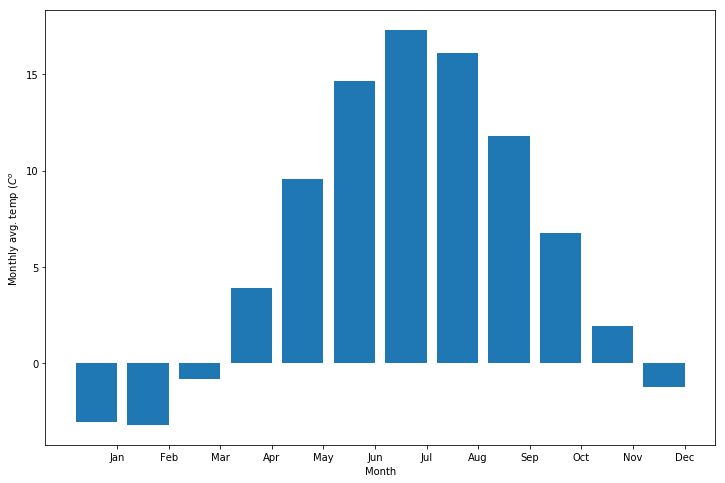

In [24]:
months = np.arange(1,13)
%timeit -n3 -r10 monthly_mean = calc_monthly_mean_scalar(data)
monthly_mean = calc_monthly_mean_scalar(data)

fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.bar(months, monthly_mean)
ax.set_xticks(months+0.4)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp $(C^o$")

The results should be the same (correct) ones that we saw previously in our lecture.  On my machine, even with these 77thousand+ 
records, the function only takes about 500ms, approximately 1/2 of a second, to complete.  This is not bad, but lets try 
reimplementing this algorithm as a vectorized function.

The equivalent of the first step we took before, finding all records that belong to a particular month, can be done using 
the fancy indexing / boolean indexing trick that was discussed in the NumPy lectures.  For example, to get all records for January:

In [25]:
jan_bi = data[:,1] == 1 # a boolean index, all indices where column 1 == 1 will be true, all others false
print(data[jan_bi])
print(data[jan_bi].shape)

print(77000. /12.)

[[ 1800.      1.      1.  ...,    -6.1    -6.1     1. ]
 [ 1800.      1.      2.  ...,   -15.4   -15.4     1. ]
 [ 1800.      1.      3.  ...,   -15.    -15.      1. ]
 ..., 
 [ 2011.      1.     29.  ...,     0.2     0.2     1. ]
 [ 2011.      1.     30.  ...,    -0.8    -0.8     1. ]
 [ 2011.      1.     31.  ...,    -1.     -1.      1. ]]
(6572, 7)
6416.666666666667


As you should see, the above only contains rows where the month column (column 1) is == to 1 (January).

What we really need is the temperature data from these records, which we can easily get by using the boolean index we just
created, but only getting data from the 3rd column that contains the temperatures only for those selected days in January:

In [26]:
data[jan_bi, 3]

array([ -6.1, -15.4, -15. , ...,   1. ,   0. ,  -0.2])

The result now is simply all of the temperatures  (in degree celcius) recorded for records in the month of January.

We could get the mean of these values as we did before (e.g. an explicit scalar loop to sum up the temperatures then
calculate the average), but we will instead use NumPy's vectorized implementation of mean.  The mean() function in the NumPy
library expects a vector as input, and it efficiently calculates the mean of all of the values in the vector:

In [27]:
print(np.mean(data[jan_bi, 3]))
%timeit np.mean(data[jan_bi, 3])

-3.04476567255
1000 loops, best of 3: 225 µs per loop


For my computer, it takes about 70 **micro** seconds to calculate the mean of these temperature values (a microsecond is .001 of a 
millisecond).

Be aware that there are a lot of functions, like sum, abs, sin, cos, that have scalar implementations in the global Python 
namespace or in the Python math or other libraries, and have corresponding vector implementations in the NumPy library.  
That is why, for this notebook, I explicitly imported numpy into the np namespace, so I could be sure of and demonstrate the 
difference of these standard function.  

For example, if you calculate the sum using the scalar (not vectorized) implementation from the Python built-in namespace, 
you get much slower performance: (turns out that iPython imports numpy into the global namespace by default, so in order to access the builtin version of sum, I have to explicitly find it).  So here, we compare the time it takes to sum the data using the standard 
built in Python scalar sum() method, vs. the time of using the vectorized Numpy sum() method: 

In [28]:
print(__builtin__.sum(data[jan_bi, 3]))
%timeit __builtin__.sum(data[jan_bi, 3])

print(np.sum(data[jan_bi, 3]))
%timeit np.sum(data[jan_bi, 3])

4030. / 633

-20010.2
1000 loops, best of 3: 890 µs per loop
-20010.2
1000 loops, best of 3: 216 µs per loop


6.36650868878357

On my machine, it takes 4.03 ms to do a sum using a scalar implementation, but only 663 micro seconds (1000 micro seconds = 1 ms) 
to perform the vectorized sum.  This is about a 6x speedup in performance.

Lets go back now to our original task and put these vectorized implementations of calculating the mean together to implement 
a version of calculating all the monthly means using vectorized operations.  We still  need to perform 12 separate 
mean()s of the data, there is not (obvious straightforward) way to vectorize this.  In fact, in your lecture notebook 
a loop was actually used (in the form of a list comprehension).  I will show 2 versions of our previous function, but now
vectorized.  First with a  more straight-forward loop implementation:

In [29]:
def calc_monthly_mean_vectorized_v1(data): # use a standard loop
    months = np.arange(1,13)
    monthly_means = []
    for month in months:
        monthly_means.append( np.mean(data[ data[:,1] == month, 3]) )
    return monthly_means

The next implementation is equivalent, but a bit more consice because we use a list comprehension in order to populate
the array of monthly_mean temperature values.  Using the list comprehension also negates the need for a temporary variable to hold the values to be returned, we can simply return the resulting list from the comprehension:

In [30]:
def calc_monthly_mean_vectorized_v2(data): # use a list comprehension
    months = np.arange(1,13)
    return [np.mean(data[data[:,1] == month, 3]) for month in months]

Which version you prefer is simply a matter of taste.  They will both run with equivalent performance, as they both fundamentally 
have a single scalar loop over the 12 months, but the mean for a month is calculated using vector operations.

For readability, and especially for beginning programmers, you may prefer version 1, or even the scalar implementation, as 
they might be more readable and understandable to inexperienced developers.  However the vectorized version 2 is closer to 
what would be expected to be produced in a scientific/engineering shop, as such users will be comfortable with vector operations 
like these, and the version most concisely expresses the idea of generating the mean for all the months in the data.

Lets test out the execution and check the performance.

3 loops, best of 10: 5.1 ms per loop
3 loops, best of 10: 5.05 ms per loop


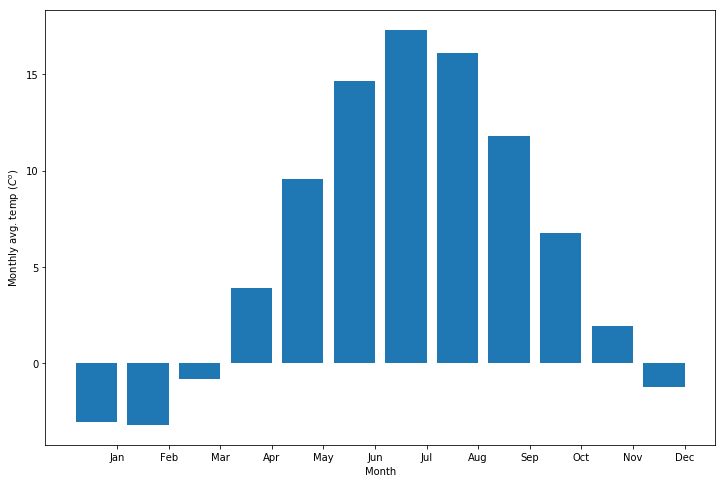

In [31]:
months = np.arange(1,13)
%timeit -n3 -r10 monthly_mean = calc_monthly_mean_vectorized_v1(data)
%timeit -n3 -r10 monthly_mean = calc_monthly_mean_vectorized_v2(data)
monthly_mean = calc_monthly_mean_vectorized_v2(data)

fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.bar(months, monthly_mean)
ax.set_xticks(months+0.4)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp $(C^o)$")

You should see no real difference in performance between v1 and v2, they both take about 15 ms to complete.  Also notice that the 
results are correct (same as previous implementation, in any case).

Finally compare the performance of the vector and scalar versions.  The vector versions take about 15ms, compared to 500ms we saw 
for the scalar implementation.  This is a speedup of over 20X.  This type of speedup is not atypical when correctly vectorizing a 
function or simulation.  The speedup is not really needed here, but a 20X increase in overall speed for big simulations often 
means the difference from running simulations and getting results fairly interactively (immediately) to having to wait hours 
or days to see the result.